In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
import seaborn as sns;sns.set()

In [ ]:
df = pd.read_csv("titanic.csv")

In [ ]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df["Age"].fillna(29,inplace = True)
df["Embarked"].fillna("U",inplace = True)

In [ ]:
df["Age"].fillna(29,inplace = True)
df["Cabin"].fillna("UNKNOWN",inplace = True)
df["Embarked"].fillna("U",inplace = True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNKNOWN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNKNOWN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNKNOWN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,UNKNOWN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,UNKNOWN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
stringValues = ["Sex","Name","Ticket","Cabin","Embarked"]
for i in stringValues:
  # get all unique values in a list. Index of each 
  uniqueList = list(set(df[i]))
  # Create replace dictionary with key as string to be replaced and value as integer encoding for the string
  replaceDict = {}
  for j in range(len(uniqueList)):
    replaceDict[uniqueList[j]] = j
  df = df.replace({i : replaceDict})

In [ ]:
def findUnique(col):
  print("The number of unique values are "+ str(df[col].nunique()))
  print("The unique values are :")
  print( df[col].unique())

In [ ]:
findUnique('Name')
findUnique('Ticket')
findUnique('Cabin')
findUnique('Embarked')

The number of unique values are 891
The unique values are :
[ 79  18 445 556 647 103 528 614 561 880 328 198 179 582 213 436 204 818
 163 187 775  51 799 234 801 552 169 505 151 323 567 267 411 305 276 522
 646 432 571 222 540 238 535 586 217 497 239 829 355 538 300 633  20 682
 107 668 617 591 800 555 521 815 224 620  59 314 499  89 134 733 652 429
  69 704 401 437 520 488 583  25 737 632 183 321 113 150  92 350 343 426
 449 119 717 319 165  30 604 851 446 648  68 748   6 384 867  75 577 501
 363 726 232 508 135 888 490 722 651 581 203 324  76 360 500  77 145  72
 237 109 619 127 550 483 752 544 837 873 284 240 688 791 802 377  82 421
  84 524 372 229 796 675 713 554 170 435 835 205  43 549 787 732 847 531
 144 570 622 192 808 882 263 157 310 400 709 111 283 553 253 745 196 173
 506 705 692 564   9  88 430 519 532 821 115 100 876 394 827 250 171 592
 215 608 379  63 641 223 447 666 542 431 875 843 790 807  73 870 131 760
  46 425 416 839 154 761 133 603 293 409  96 593 330 485 864 724

#Without Additional Preprocessing

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,79,0,22.0,1,0,157,7.2500,78,2
1,2,1,1,18,1,38.0,1,0,215,71.2833,145,1
2,3,1,3,445,1,26.0,0,0,652,7.9250,78,2
3,4,1,1,556,1,35.0,1,0,519,53.1000,17,2
4,5,0,3,647,0,35.0,0,0,111,8.0500,78,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,27.0,0,0,189,13.0000,78,2
887,888,1,1,656,1,19.0,0,0,638,30.0000,146,2
888,889,0,3,211,1,29.0,1,2,16,23.4500,78,2
889,890,1,1,480,0,26.0,0,0,206,30.0000,36,1


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
X = df.drop(columns=['PassengerId','Survived','Name','Age','Embarked','Cabin','Sex'])

In [ ]:
X

,Pclass,SibSp,Parch,Ticket,Fare
0,3,1,0,157,7.2500
1,1,1,0,215,71.2833
2,3,0,0,652,7.9250
3,1,1,0,519,53.1000
4,3,0,0,111,8.0500
...,...,...,...,...,...
886,2,0,0,189,13.0000
887,1,0,0,638,30.0000
888,3,1,2,16,23.4500
889,1,0,0,206,30.0000


In [ ]:
X.shape

(891, 5)

In [ ]:
Y = pd.DataFrame(df.Survived)

In [ ]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
Y.shape

(891, 1)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size =0.2)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((712, 5), (179, 5), (712, 1), (179, 1))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(random_state=42)

In [ ]:
mlp.score(X_test,Y_test)

0.6759776536312849

In [ ]:
mlp.coefs_

[array([[-5.89076960e-03,  2.30360248e-01,  1.23265000e-01,
          6.16306657e-02, -1.52082744e-01, -1.61294436e-01,
         -2.25719013e-01,  6.05181730e-02,  2.99191122e-02,
          1.87436743e-02, -9.92733907e-02,  1.98534206e-01,
          1.30089947e-01, -1.23168000e-01, -1.67264070e-01,
         -1.67577552e-01, -1.63636107e-02,  1.92500437e-04,
         -2.92842101e-02, -1.25646426e-01,  6.80167640e-02,
         -1.58134050e-01, -9.51130584e-02, -2.54707324e-02,
         -3.65227251e-02,  1.49464876e-01, -1.59035228e-01,
         -8.23666795e-03,  2.89420266e-03, -8.99698697e-02,
          4.11358654e-03, -1.72611799e-01, -2.66712212e-01,
          8.83175438e-02,  9.42868466e-02,  2.01979921e-01,
         -1.10723617e-01, -1.78208825e-01,  1.21729014e-01,
         -1.08958491e-03, -1.47822962e-01,  4.54024848e-02,
         -9.42794589e-02,  3.41930281e-01, -2.36213713e-02,
          6.27424527e-02, -1.05420148e-01,  1.97859729e-02,
          4.43416859e-03, -1.70225084e-0

In [ ]:
mlp.intercepts_

[array([ 6.61585399e-02, -2.24680709e-01, -6.61523615e-02, -1.63554211e-01,
        -2.18206492e-01,  2.38883405e-01, -9.89934962e-02,  1.63001527e-01,
        -1.50549419e-01,  5.16536236e-02,  1.86116009e-01,  6.02584617e-02,
        -2.55856490e-02, -3.09046758e-02, -5.92148545e-02,  2.20356865e-01,
         1.20876352e-01,  1.25516736e-01, -1.89645636e-01,  9.49765881e-02,
         2.17961053e-01, -1.62559708e-01, -2.95535543e-01,  7.11091348e-02,
         7.93338597e-02,  1.71935959e-01, -1.74632838e-01,  1.25701771e-01,
        -1.41309964e-01, -2.02267973e-01, -2.32902465e-01,  1.16527951e-01,
         5.03720720e-02, -7.03403366e-03, -5.74461191e-02,  1.59333806e-01,
        -3.32014590e-02,  1.34813454e-01, -1.80730144e-02, -8.51130154e-02,
        -4.65521449e-02, -8.63253697e-02,  1.16024036e-01,  8.34952766e-02,
        -1.43717980e-01,  1.69675482e-01, -6.64961046e-02,  3.13318763e-02,
         3.96699052e-01,  1.03638364e-01, -1.93592170e-01,  2.21479357e-01,
         4.5

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

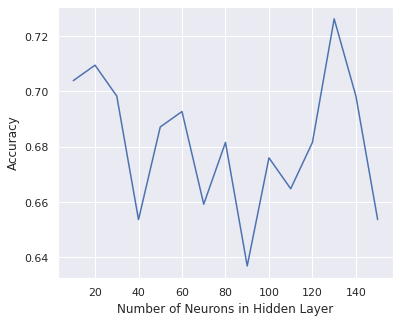

In [ ]:
neu_num =[]
neu_score = []
for i in range(10,151,10):
  mlp = MLPClassifier(hidden_layer_sizes=(i,),random_state=42)
  mlp.fit(X_train,Y_train)
  neu_score.append(mlp.score(X_test,Y_test))
  neu_num.append(i)


plt.figure(figsize=(6,5))
plt.plot(neu_num,neu_score)
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print("Weight of All Neural Connections:\n")
mlp.coefs_

Weight of All Neural Connections:



[array([[-1.41346795e-02,  2.14090052e-01,  3.80388870e-02,
          3.58983183e-03, -2.18191473e-02, -4.65337131e-02,
         -4.02201215e-02,  1.30222417e-01,  3.53852349e-02,
          1.47759939e-01, -4.84665917e-02,  2.19361700e-01,
          9.62310401e-02, -8.16516676e-02, -1.60230707e-01,
         -3.70694557e-02, -4.59884280e-03, -2.40402284e-02,
          9.21495875e-03, -4.77452979e-02,  8.65601168e-04,
         -1.09811120e-01, -5.47730667e-03, -8.76909202e-02,
          1.65913607e-02,  1.47321908e-01, -1.53116454e-02,
         -2.76163175e-02,  1.45332414e-03, -1.62195770e-01,
          7.67400352e-02, -1.64191823e-01, -1.75662381e-01,
          1.43001944e-01,  2.16639741e-01,  1.55703534e-01,
         -1.07631443e-01, -3.21979354e-02,  1.07771842e-01,
         -5.84992158e-02, -2.76429673e-02, -4.12221549e-02,
         -4.53619064e-02,  1.01928960e-01, -8.38808965e-03,
          1.20911820e-01, -3.97215492e-02,  3.61215127e-02,
         -1.61714867e-02, -1.59254960e-0

In [ ]:
mlp.intercepts_

[array([-0.1345634 ,  0.1925587 ,  0.06467761, -0.0819337 , -0.14194482,
         0.17467277,  0.04724809,  0.00751672,  0.15066624,  0.18363505,
        -0.13706437, -0.05935705, -0.1142978 ,  0.11421477, -0.19954648,
         0.06249995,  0.10327631,  0.13440354, -0.02443921,  0.14119897,
        -0.15321466,  0.14798208, -0.14658154, -0.05601216,  0.13115729,
        -0.12201798, -0.10653836,  0.07187995,  0.07030432,  0.06831694,
         0.09110666,  0.00173416, -0.10300003, -0.07740119, -0.10567176,
         0.17539102,  0.00169145, -0.03901452,  0.00053964,  0.16071145,
        -0.13640466,  0.01246372,  0.00231717,  0.08159473, -0.18962147,
         0.16674816,  0.18481125,  0.04272381,  0.06230948,  0.15040132,
         0.05850416, -0.15319109,  0.02860953,  0.02694167, -0.01440215,
         0.09303974,  0.15306411,  0.18384135, -0.00457905, -0.16883184,
         0.20656258,  0.15731843, -0.13296989,  0.17815863,  0.14555255,
         0.00741269,  0.03591647, -0.02419462, -0.1

In [ ]:
max(neu_score)

0.7262569832402235

In [ ]:
neu_num[13]

140

In [ ]:
neu_score[13]

0.6983240223463687

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

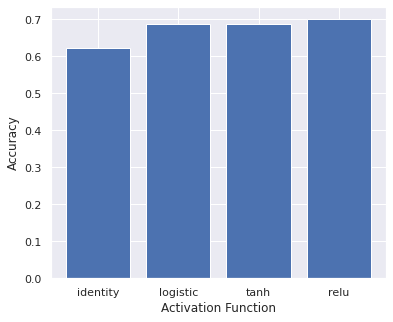

In [ ]:
func = ['identity','logistic','tanh','relu']
ac_score=[]
for i in func:
  mlp = MLPClassifier(hidden_layer_sizes=(140,),activation=i,random_state=42)
  mlp.fit(X_train,Y_train)
  ac_score.append(mlp.score(X_test,Y_test))

plt.figure(figsize=(6,5))
plt.bar(func,ac_score)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print("Weight of All Neural Connections:\n")
mlp.coefs_
mlp.intercepts_

Weight of All Neural Connections:



[array([ 0.02927805, -0.20227076, -0.06647561, -0.14873404, -0.1776357 ,
         0.2084573 , -0.07227322,  0.1096358 , -0.14619859,  0.07384222,
         0.10587061,  0.02188709,  0.00773989,  0.02258236, -0.09740901,
         0.1904525 ,  0.13450857,  0.17674858, -0.17144958,  0.09392569,
         0.16860111, -0.12192563, -0.17636584,  0.09809707,  0.0439912 ,
         0.11919846, -0.1291404 ,  0.1398934 , -0.12138937, -0.13683758,
        -0.11997839,  0.14265128,  0.06720852,  0.02387053, -0.08570445,
         0.21819623,  0.01733051,  0.11673023, -0.02476224, -0.05006369,
        -0.01518329, -0.10231673,  0.11808434,  0.01866967, -0.1280277 ,
         0.15122528, -0.04723748,  0.03439731,  0.15623791,  0.0661197 ,
        -0.15586047,  0.1620573 ,  0.08612993, -0.05101928, -0.16376517,
         0.13537241,  0.04885017, -0.00197017,  0.17627176,  0.13952181,
        -0.13048467, -0.06024126, -0.1023242 ,  0.08143896, -0.17869575,
         0.01072568,  0.10677819,  0.12118164, -0.0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

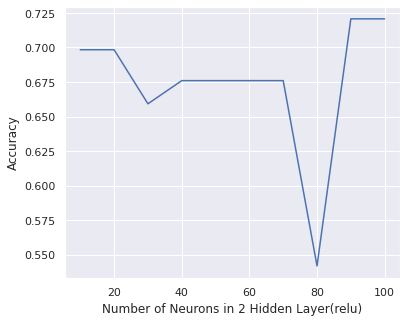

In [ ]:
lay2_num =[]
lay2_score=[]
for i in range(10,101,10):
  mlp = MLPClassifier(hidden_layer_sizes=(140,i),activation='relu',random_state=42)
  mlp.fit(X_train,Y_train)
  lay2_score.append(mlp.score(X_test,Y_test))
  lay2_num.append(i)

plt.figure(figsize=(6,5))
plt.plot(lay2_num,lay2_score)
plt.xlabel('Number of Neurons in 2 Hidden Layer(relu)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print("Weight of All Neural Connections:\n")
mlp.coefs_

Weight of All Neural Connections:



[array([[-2.02799910e-02,  1.70222249e-01,  4.15022511e-02,
          1.12838811e-02, -7.45374444e-02, -1.65826306e-01,
         -1.06649090e-01,  1.26340943e-01,  9.76122792e-03,
          3.51806566e-02, -1.19487038e-01,  1.69594354e-01,
          1.54605496e-01, -1.23052671e-01, -1.41361568e-01,
         -1.54271059e-01, -3.20546909e-02, -1.63805965e-02,
         -2.86365511e-02, -3.53606273e-02,  1.15725519e-02,
         -1.27082017e-01, -3.51247284e-02, -1.78687364e-02,
         -1.83432076e-02,  1.44014836e-01, -1.02104288e-01,
          2.73584954e-02,  1.02339750e-02, -1.10604401e-01,
          5.24513832e-02, -1.55809563e-01, -1.04292480e-01,
          1.50916285e-01,  2.05406978e-01,  2.07750342e-01,
         -8.52975415e-02, -9.33941142e-02,  2.92151278e-02,
         -5.44496155e-03, -8.54115850e-02,  1.31219436e-02,
         -2.12676097e-01,  1.81479687e-01, -1.08668898e-01,
          6.47085505e-02, -3.02046612e-02, -2.73706415e-03,
          2.19388957e-02, -1.12406995e-0

In [ ]:
mlp.intercepts_

[array([ 0.02800758, -0.19227878, -0.06647561, -0.14873404, -0.1776357 ,
         0.18508834, -0.07227322,  0.11404297, -0.12061141,  0.07384222,
         0.10587061,  0.02509356, -0.00133415, -0.04667387, -0.08426909,
         0.1617137 ,  0.13450857,  0.17441996, -0.15336017,  0.09392569,
         0.16921528, -0.12048478, -0.17636584,  0.09809707,  0.02838466,
         0.1539744 , -0.13752863,  0.13167147, -0.12138937, -0.13683758,
        -0.13266522,  0.11587922,  0.06720852, -0.00688284, -0.05324327,
         0.21429016, -0.04945145,  0.12880472, -0.02476224, -0.05006369,
        -0.01518329, -0.07647336,  0.08549437,  0.00940673, -0.11783974,
         0.16115998, -0.04723748,  0.00851897,  0.16836697,  0.05572747,
        -0.15586047,  0.1902935 ,  0.05094054, -0.05398786, -0.16359928,
         0.12848199,  0.04885017, -0.00139483,  0.1695106 ,  0.12677446,
        -0.13528197, -0.08856714, -0.1023242 ,  0.08534714, -0.16781903,
         0.01332957,  0.10677819,  0.16664602, -0.0

In [ ]:
max(lay2_score)

0.7206703910614525

In [ ]:
max(lay2_num)

100

In [ ]:
lay2_score[7]

0.5418994413407822

using different activation function

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

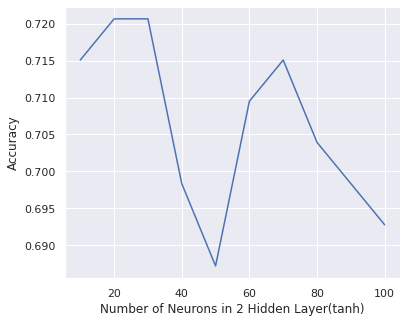

In [ ]:
alay2_num =[]
alay2_score=[]
for i in range(10,101,10):
  mlp = MLPClassifier(hidden_layer_sizes=(140,i),activation='tanh',random_state=42)
  mlp.fit(X_train,Y_train)
  alay2_score.append(mlp.score(X_test,Y_test))
  alay2_num.append(i)

plt.figure(figsize=(6,5))
plt.plot(alay2_num,alay2_score)
plt.xlabel('Number of Neurons in 2 Hidden Layer(tanh)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
max(alay2_score)

0.7206703910614525

In [ ]:
max(alay2_num)

100

In [ ]:
alay2_score[9]

0.6927374301675978

using logistic func

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

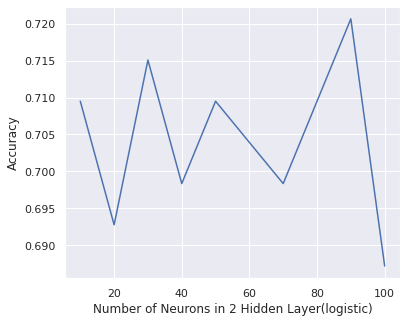

In [ ]:
blay2_num =[]
blay2_score=[]
for i in range(10,101,10):
  mlp = MLPClassifier(hidden_layer_sizes=(140,i),activation='logistic',random_state=42)
  mlp.fit(X_train,Y_train)
  blay2_score.append(mlp.score(X_test,Y_test))
  blay2_num.append(i)

plt.figure(figsize=(6,5))
plt.plot(blay2_num,blay2_score)
plt.xlabel('Number of Neurons in 2 Hidden Layer(logistic)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
max(blay2_score)

0.7206703910614525

In [ ]:
max(blay2_num)

100

In [ ]:
blay2_score[9]

0.6871508379888268

#With Additional Preprocessing

In [ ]:
df["Cabin"].fillna("UNKNOWN",inplace = True)

In [ ]:
X_new = df.drop(columns=['PassengerId','Survived','Name','Sex',])
Y_new = pd.DataFrame(df.Survived)
X_new.shape
Y_new.shape

(891, 1)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, random_state = 42, test_size =0.2)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((712, 8), (179, 8), (712, 1), (179, 1))

In [ ]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(random_state=42)

In [ ]:
mlp.score(X_test,Y_test)

0.6983240223463687

In [ ]:
mlp.coefs_

[array([[-2.23884134e-02,  2.09325199e-01,  1.03335832e-01,
          4.88218984e-02, -1.53439748e-01, -1.62493627e-01,
         -1.89816592e-01,  1.41310605e-01,  4.63442469e-02,
          1.27611145e-01, -1.51265381e-01,  2.20839317e-01,
          1.58348673e-01, -1.36612040e-01, -1.48129441e-01,
         -1.34147054e-01, -9.63992588e-02,  6.24031033e-02,
         -3.03730073e-02, -9.68685759e-02,  5.52571869e-02,
         -1.74707029e-01, -5.01673635e-02, -7.06893093e-02,
          4.41660598e-03,  1.33454954e-01, -1.29544010e-01,
          8.00055291e-03,  1.43062069e-02, -2.57579462e-01,
          2.57180087e-02, -1.52681150e-01, -2.00974781e-01,
          2.02454019e-01,  2.10190915e-01,  1.43151628e-01,
         -1.35251014e-01, -1.88532211e-01,  8.85752409e-02,
         -6.75039134e-03, -1.80624240e-01, -2.14243984e-03,
         -1.45517023e-01,  1.84294282e-01, -1.12954465e-01,
          7.61454423e-02, -8.74785122e-02,  1.13037290e-02,
          2.96167627e-02, -1.42618966e-0

In [ ]:
mlp.intercepts_

[array([ 0.09769323, -0.16876406,  0.02995968,  0.0548881 , -0.03753756,
         0.11188032,  0.21009585,  0.17125154, -0.0265869 , -0.16758318,
         0.22855633,  0.15667628, -0.17339795,  0.19520463,  0.17868028,
         0.02907727,  0.03520499, -0.01390542, -0.20629724, -0.07828021,
         0.14747944, -0.23958759, -0.04929674, -0.05154679,  0.02370761,
         0.19448117, -0.06813075, -0.06911331,  0.11195916, -0.05408464,
        -0.14724556, -0.01805553, -0.16489575, -0.16038779, -0.01806237,
        -0.04238308,  0.17510652, -0.06226993,  0.03841896,  0.0922435 ,
        -0.23869858,  0.08038287, -0.1517753 ,  0.20626956, -0.16675776,
        -0.04196309, -0.1957964 ,  0.23799458,  0.00831909,  0.05615049,
        -0.19975143,  0.12249618, -0.1432145 ,  0.19143739, -0.13919375,
        -0.15473451, -0.23048532,  0.01093347,  0.04856038, -0.17593327,
         0.11535208, -0.0223607 ,  0.00991285, -0.02485539, -0.04736883,
         0.02672416, -0.16252131, -0.14986735,  0.1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

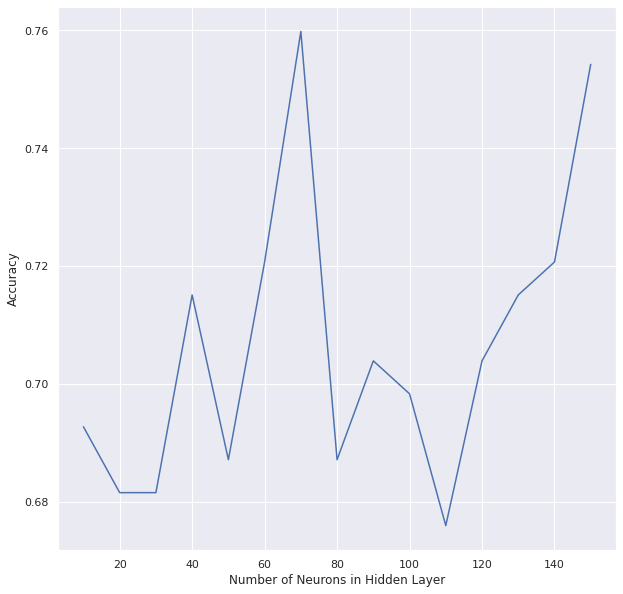

In [ ]:
neu_num =[]
neu_score = []
for i in range(10,151,10):
  mlp = MLPClassifier(hidden_layer_sizes=(i,),random_state=42)
  mlp.fit(X_train,Y_train)
  neu_score.append(mlp.score(X_test,Y_test))
  neu_num.append(i)


plt.figure(figsize=(10,10))
plt.plot(neu_num,neu_score)
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
mlp.coefs_

[array([[-3.49674322e-02,  2.65333788e-01,  6.17343912e-03, ...,
          1.14771725e-03, -1.61168679e-01, -7.83286790e-02],
        [ 1.61148199e-01, -2.61025743e-02, -2.05926426e-02, ...,
         -1.14716960e-01,  6.13246337e-02, -1.66493487e-01],
        [-1.39971216e-01,  1.63480403e-01,  3.33710212e-05, ...,
          1.15451880e-01,  2.23691361e-02, -2.42421209e-01],
        ...,
        [-9.44573477e-02,  1.81463177e-01,  9.64007814e-04, ...,
          1.39976435e-01, -1.93162198e-01, -1.38442783e-01],
        [-1.96472749e-03, -2.27661894e-01, -1.53650293e-02, ...,
         -1.89522619e-01,  1.39126351e-01, -1.48646166e-01],
        [ 1.79061246e-01,  1.05234690e-01,  3.53305168e-02, ...,
          1.76622077e-01,  9.20484721e-02, -1.16180943e-01]]),
 array([[ 1.35769607e-01],
        [ 6.67597951e-02],
        [-1.09922217e-04],
        [ 6.04892090e-03],
        [-4.59816657e-02],
        [ 1.44942863e-01],
        [ 1.23293062e-01],
        [-8.29763316e-02],
        [-1.0

In [ ]:
mlp.intercepts_

[array([ 0.12871888, -0.08991892, -0.18624847, -0.06874649, -0.04020343,
         0.12912807,  0.06910098,  0.03531208, -0.1410243 ,  0.21144552,
        -0.02877024, -0.03899026, -0.12264133,  0.18710701,  0.09504898,
        -0.1269984 , -0.18187279,  0.11079588,  0.04217849, -0.11061535,
         0.11948754, -0.18681344, -0.07220923,  0.15203536, -0.04942139,
         0.05398936, -0.0064068 , -0.06889958,  0.18420329, -0.03533633,
         0.1339236 , -0.12371913, -0.11132038, -0.19750302,  0.05911091,
        -0.07282863,  0.15501807, -0.01973245,  0.20946834, -0.1400395 ,
         0.14366789,  0.12956019,  0.09745003,  0.10417438,  0.10173198,
         0.0737737 , -0.16564035, -0.20048065,  0.18167334,  0.06342363,
         0.11903082, -0.00765797, -0.1772711 , -0.12825771,  0.0693395 ,
        -0.04820569, -0.06567394,  0.0339034 , -0.13640771,  0.02876849,
        -0.11392746,  0.09782675, -0.08573538, -0.07682061, -0.15283148,
        -0.16663535, -0.02829024, -0.02444702,  0.1

In [ ]:
max(neu_score)

0.7597765363128491

In [ ]:
neu_num[14]

150

In [ ]:
neu_score[14]

0.7541899441340782

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

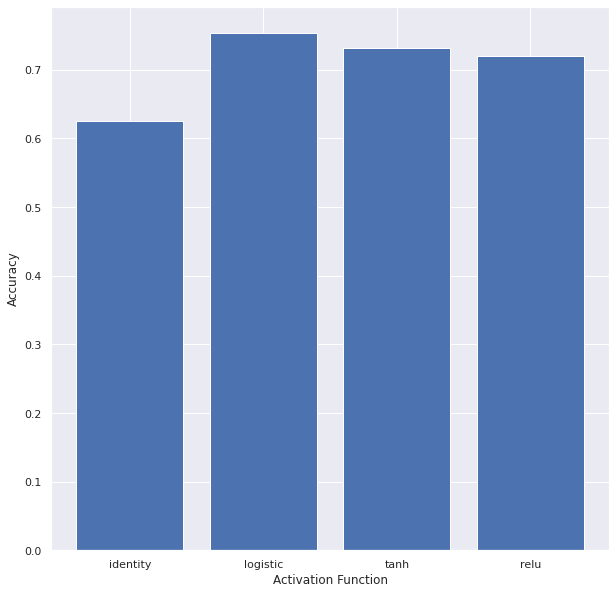

In [ ]:
func = ['identity','logistic','tanh','relu']
ac_score=[]
for i in func:
  mlp = MLPClassifier(hidden_layer_sizes=(140,),activation=i,random_state=42)
  mlp.fit(X_train,Y_train)
  ac_score.append(mlp.score(X_test,Y_test))

plt.figure(figsize=(10,10))
plt.bar(func,ac_score)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

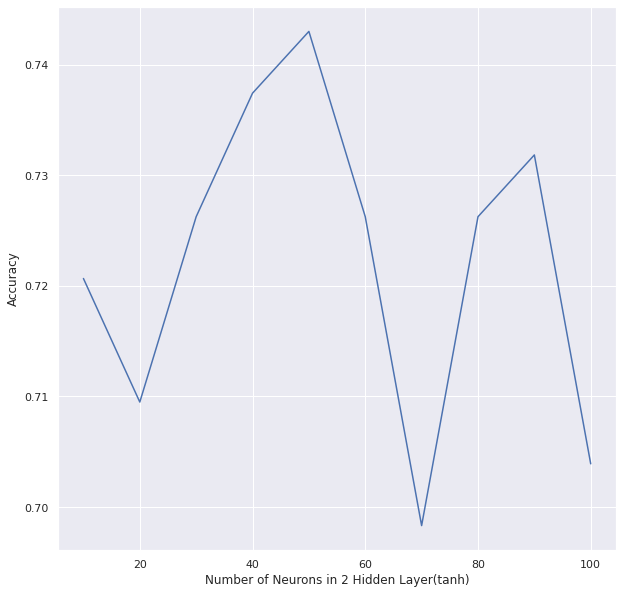

In [ ]:
lay2_num =[]
lay2_score=[]
for i in range(10,101,10):
  mlp = MLPClassifier(hidden_layer_sizes=(140,i),activation='tanh',random_state=42)
  mlp.fit(X_train,Y_train)
  lay2_score.append(mlp.score(X_test,Y_test))
  lay2_num.append(i)

plt.figure(figsize=(10,10))
plt.plot(lay2_num,lay2_score)
plt.xlabel('Number of Neurons in 2 Hidden Layer(tanh)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
max(lay2_score)

0.7430167597765364

In [ ]:
lay2_num[9]

100

In [ ]:
lay2_score[9]

0.6815642458100558

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

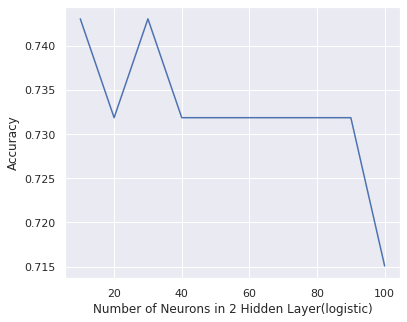

In [ ]:
blay2_num =[]
blay2_score=[]
for i in range(10,101,10):
  mlp = MLPClassifier(hidden_layer_sizes=(140,i),activation='logistic',random_state=42)
  mlp.fit(X_train,Y_train)
  blay2_score.append(mlp.score(X_test,Y_test))
  blay2_num.append(i)

plt.figure(figsize=(6,5))
plt.plot(blay2_num,blay2_score)
plt.xlabel('Number of Neurons in 2 Hidden Layer(logistic)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
max(blay2_score)

0.7430167597765364

In [ ]:
blay2_score[9]

0.7150837988826816

In [ ]:
blay2_num[9]

100

Conclusion:-
The Default(identity) Accuracy is higher for the preprocessed Data Set than the unprocessed ones
it also shows higher accuracy for the hidden layers than the base data set and has higher values for logistic and tanh activation functions.
Thus the preprocessing techniques helps improve classsification accuracy for the hidden layer and specific activation functions-logistic,tanh while giving lower scores for identity and relu